In [16]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

# Introduction de projet

Comme nous sommes dans un cours de bio-informatique et pendant la premiere séance nous avons vu pas mal de sujet qui ont été traité par le Groupe d'experts intergouvernemental sur l'évolution du climat (GIEC). Nous avons choisi d'étudier sur la séchresse car Selon les rapports du GIEC, la sécheresse est l'un des effets les plus importants du changement climatique. Les modèles climatiques prévoient une augmentation de la fréquence et de l'intensité des sécheresses dans de nombreuses régions du monde au cours du siècle à venir. Ces sécheresses peuvent avoir des effets dévastateurs sur les écosystèmes, les communautés et l'économie.et comme la mesure de  la pluie est l'un des principaux facteurs qui déterminent l'occurrence ou non de la sécheresse. en choisi le data set qui contient des données météorologiques, elles étaient collecté au Cote d'ivoire par l'entreprise HD-RAIN, le data set est une time series, il contient 6 colonnes:
- signal_std (données en mode standard ; baisse quand il pleut)
- signal_rad (données en mode radiométrique ; augmente quand il pleut)
- pluie (0/1 ,il pleut / il pleut pas)
- baseline_std (données en mode standard que l'on mesurerait s'il ne pleuvait pas)
- baseline_rad (données en mode radiométrique que l'on mesurerait s'il ne pleuvait pas)
- pluvio_db_std (perte du signal (toujours > 0) due à la pluie causée sur le signal standard)
- pluvio_db_rad (gain du signal (toujours > 0) dû à la pluie causé sur le signal radiométrique)
Nous avons toujours chercher à savoir comment la pluie est-elle détecter? comment interpréter les signaux qu'on reçoint des capteurs ? quel est l'utilité de ces signaux dans la prévisions métérologiques ?
L'objectif de notre projet est de détecter les prévisions métérologiques prédire pluie/non pluie

(40320, 7)

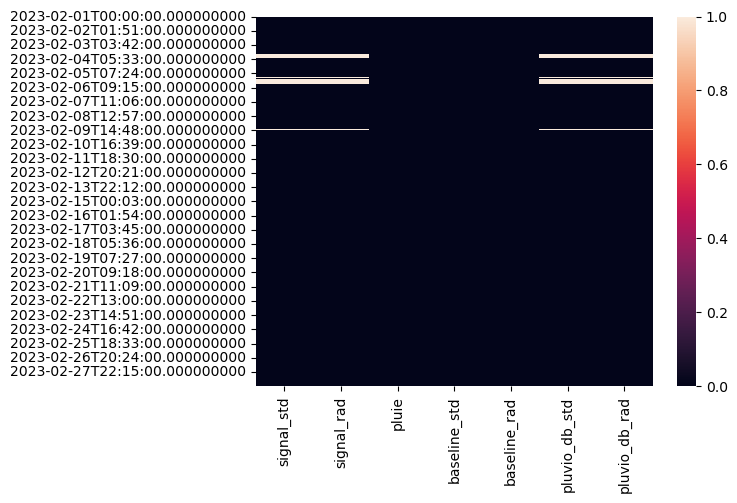

In [17]:
civ1 = pd.read_csv('CIV-00001.csv', index_col='Unnamed: 0',parse_dates=True);
sns.heatmap(civ1['2023-02-01':'2023-03-01'].isna())
civ1.shape

In [18]:
civ1

,signal_std,signal_rad,pluie,baseline_std,baseline_rad,pluvio_db_std,pluvio_db_rad
2023-02-01 00:00:00,-17.08,-25.95,0.0,-17.08,-25.95,0.0,0.0
2023-02-01 00:01:00,-17.11,-25.96,0.0,-17.11,-25.96,0.0,0.0
2023-02-01 00:02:00,-17.04,-25.93,0.0,-17.04,-25.93,0.0,0.0
2023-02-01 00:03:00,-17.06,-25.94,0.0,-17.06,-25.94,0.0,0.0
2023-02-01 00:04:00,-17.05,-25.93,0.0,-17.05,-25.93,0.0,0.0
...,...,...,...,...,...,...,...
2023-02-28 23:55:00,-17.26,-25.93,0.0,-17.26,-25.93,0.0,0.0
2023-02-28 23:56:00,-17.26,-25.92,0.0,-17.26,-25.92,0.0,0.0
2023-02-28 23:57:00,-17.29,-25.93,0.0,-17.29,-25.93,0.0,0.0
2023-02-28 23:58:00,-17.25,-25.94,0.0,-17.25,-25.94,0.0,0.0


Notre data set contient 40320 lignes et 7 colonnes. il contient quelque valeurs manquantes qu'on va supprimer.

On Supprime les NAN


(38895, 7)

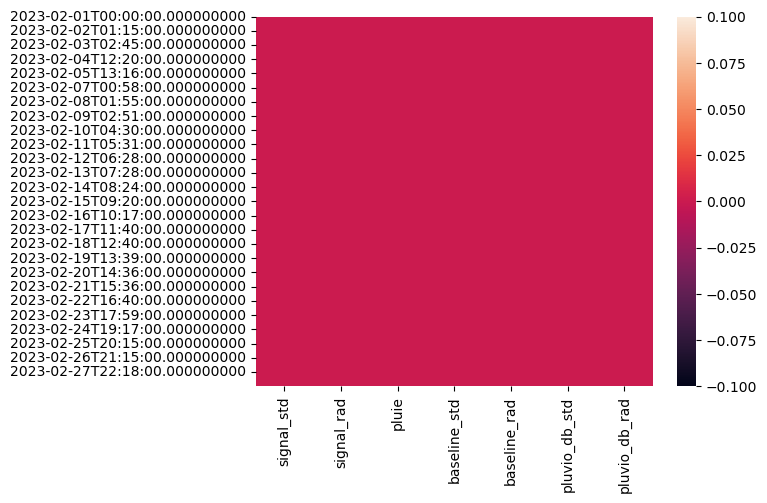

In [19]:
print("On Supprime les NAN")
civ1 = civ1.dropna()
sns.heatmap(civ1['2023-02-01':'2023-03-01'].isna())
civ1.shape

Aprés la suppression des valeurs manquantes, nous avons 38895 lignes et 7 colonnes

In [20]:
civ1.describe()

,signal_std,signal_rad,pluie,baseline_std,baseline_rad,pluvio_db_std,pluvio_db_rad
count,38895.000000,38895.000000,38895.000000,38895.000000,38895.000000,38895.000000,38895.000000
mean,-17.259424,-26.192646,0.014423,-17.256638,-26.194051,0.003315,0.001601
std,0.212491,0.229403,0.119230,0.200425,0.224263,0.073055,0.036557
min,-22.780000,-26.700000,0.000000,-22.580000,-26.700000,0.000000,0.000000
25%,-17.410000,-26.390000,0.000000,-17.410000,-26.390000,0.000000,0.000000
50%,-17.210000,-26.140000,0.000000,-17.210000,-26.140000,0.000000,0.000000
75%,-17.100000,-26.020000,0.000000,-17.100000,-26.020000,0.000000,0.000000
max,-16.520000,-23.460000,1.000000,-16.520000,-24.420000,5.497499,2.288752


On étudie la corélation


<AxesSubplot:>

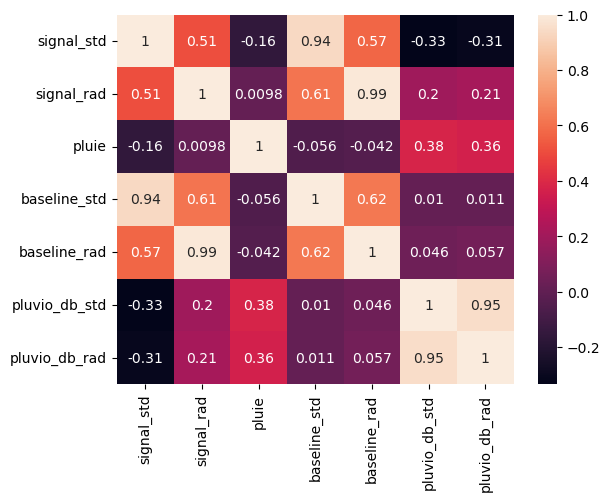

In [21]:
print("On étudie la corélation")

sns.heatmap(civ1.corr(),annot=True)

Nous remarquons d'apres le descibe et la matrice de corrélation:<br>
En mode std et ras les valeurs sont négatives:<br>
En mode standard, la mesure est effectuée en soustrayant une valeur de référence ou une moyenne, qui peut être plus grande que la valeur mesurée, donnant ainsi des valeurs négatives. En d'autres termes, si la mesure est plus petite que la valeur de référence, la différence sera négative.<br>

En mode radiométrique, les mesures sont souvent relatives à une référence ou une base arbitraire. La mesure radiométrique est effectuée en soustrayant la puissance du signal réfléchi de la puissance du signal émis. Comme la puissance du signal réfléchi est souvent plus faible que la puissance du signal émis, la mesure radiométrique peut être négative.

baseline_rad et signal_rad contient les memes valeurs lorque nous avons pas de pluie et elle change de valeurs lorsque il y'a la pluie . meme chose pour baseline_std et signal_std.<br>
Il a plu 561 fois durant le mois de février, Par contre si on compare entre " signal_std et baseline_std " et entre "signal_rad  et baseline_rad" on trouve une grande similitude entre les 2 colonnes 

C:\Users\rabia\AppData\Local\Temp\ipykernel_14124\4216256257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  civ1['signal_std9'] = civ1['signal_std'] +17.5 #juste pour les centrer
C:\Users\rabia\AppData\Local\Temp\ipykernel_14124\4216256257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  civ1['signal_rad9'] = civ1['signal_rad'] +26.5 ##juste pour les centrer


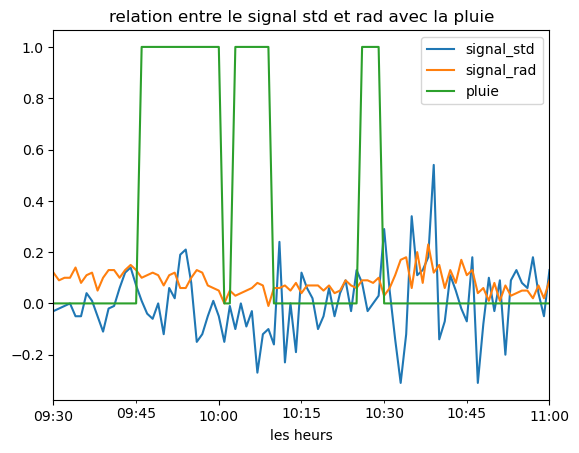

In [22]:
civ1['signal_std9'] = civ1['signal_std'] +17.5 #juste pour les centrer
civ1['signal_rad9'] = civ1['signal_rad'] +26.5 ##juste pour les centrer
plt.title('relation entre le signal std et rad avec la pluie')
civ1['2023-02-22 09:30:00':'2023-02-22 11:00:00']['signal_std9'].plot()
civ1['2023-02-22 09:30:00':'2023-02-22 11:00:00']['signal_rad9'].plot()
civ1['2023-02-22 09:30:00':'2023-02-22 11:00:00']['pluie'].plot()
plt.xlabel("les heurs")
plt.ylabel("")
plt.legend(["signal_std", "signal_rad", "pluie"])

Nous avons centrer nos données en calculant la moyenne des colonnes signal (rad et std )

In [23]:
civ1['signal_std'].mean()

-17.259423833397666

In [24]:
civ1['signal_rad'].mean()

-26.192645584265527

C:\Users\rabia\AppData\Local\Temp\ipykernel_14124\638124273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  civ1['signal_std9'] = civ1['signal_std'] +17.5 #juste pour les centrer
C:\Users\rabia\AppData\Local\Temp\ipykernel_14124\638124273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  civ1['signal_rad9'] = civ1['signal_rad'] +26.5 ##juste pour les centrer


Text(0, 0.5, 'frequence')

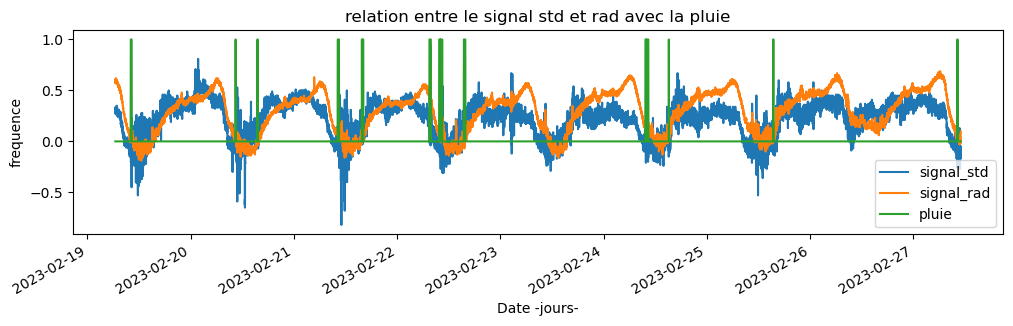

In [25]:
civ1['signal_std9'] = civ1['signal_std'] +17.5 #juste pour les centrer 
civ1['signal_rad9'] = civ1['signal_rad'] +26.5 ##juste pour les centrer
plt.title('relation entre le signal std et rad avec la pluie')
civ1['2023-02-19 06:30:00':'2023-02-27 11:00:00']['signal_std9'].plot(figsize=(12, 3))
civ1['2023-02-19 06:30:00':'2023-02-27 11:00:00']['signal_rad9'].plot(figsize=(12, 3))
civ1['2023-02-19 06:30:00':'2023-02-27 11:00:00']['pluie'].plot(figsize=(12, 3))
plt.legend(["signal_std", "signal_rad", "pluie"])

plt.xlabel("Date -jours-")
plt.ylabel("frequence")

D'après les deux dernieres figures nous analysons que lorsque le signal_std augmente et le signal_rad diminue, Nous aurons la pluie. Mais c'est dans une loi des fois nous trouvons une augmentaion de std et une diminution de rad mais il y'a pas de pluie. exemple 10:45 dans la premiere figure il y'a pas de pluie  <br>

# Visualisation du Baseline

C:\Users\rabia\AppData\Local\Temp\ipykernel_14124\3106131686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m['signal_std1'] = civ1['signal_std']+ 17.5
C:\Users\rabia\AppData\Local\Temp\ipykernel_14124\3106131686.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m['baseline_std1'] = civ1['baseline_std']+ 17.5


Text(0.5, 0, 'Date')

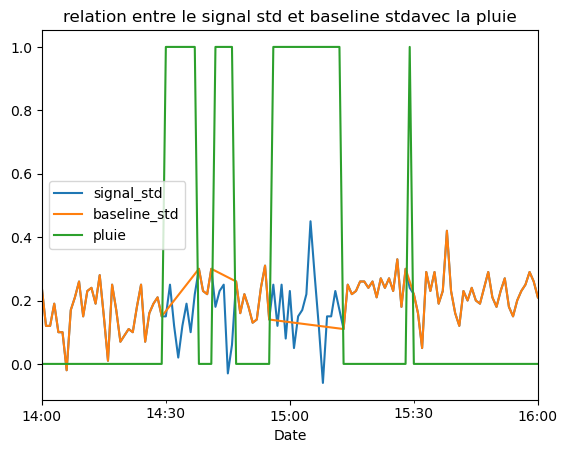

In [26]:
m = civ1
#civ1['2023-02-05':'2023-02-10 ']['signal_std'].plot()
m['signal_std1'] = civ1['signal_std']+ 17.5
m['baseline_std1'] = civ1['baseline_std']+ 17.5
plt.title('relation entre le signal std et baseline stdavec la pluie')
#m['signal_rad9'] = civ1['signal_rad9']
m['2023-02-07 14:00:00':'2023-02-07 16:00:00']['signal_std1'].plot()
m['2023-02-07 14:00:00':'2023-02-07 16:00:00']['baseline_std1'].plot()
m['2023-02-07 14:00:00':'2023-02-07 16:00:00']['pluie'].plot()
#m['2023-02-07 14:00:00':'2023-02-07 16:00:00']['signal_rad9'].plot()
plt.legend(["signal_std", "baseline_std", "pluie"])
plt.xlabel("Date")


C:\Users\rabia\AppData\Local\Temp\ipykernel_14124\4061043855.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m['signal_rad1'] = civ1['signal_rad']+ 26.5
C:\Users\rabia\AppData\Local\Temp\ipykernel_14124\4061043855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m['baseline_rad1'] = civ1['baseline_rad']+26.5


Text(0.5, 0, 'Date')

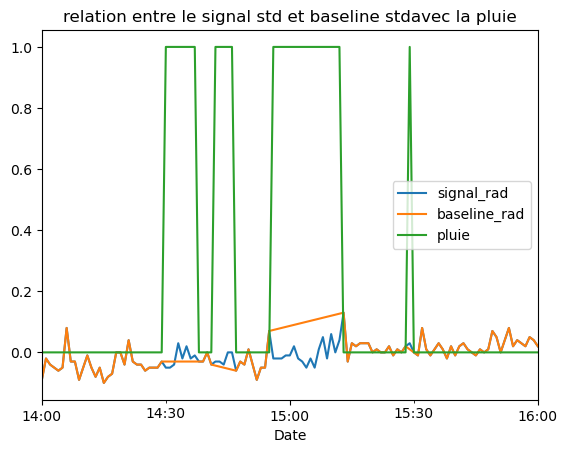

In [27]:
m = civ1
#civ1['2023-02-05':'2023-02-10 ']['signal_std'].plot()
m['signal_rad1'] = civ1['signal_rad']+ 26.5
m['baseline_rad1'] = civ1['baseline_rad']+26.5
plt.title('relation entre le signal std et baseline stdavec la pluie')
#m['signal_rad9'] = civ1['signal_rad9']
m['2023-02-07 14:00:00':'2023-02-07 16:00:00']['signal_rad1'].plot()
m['2023-02-07 14:00:00':'2023-02-07 16:00:00']['baseline_rad1'].plot()
m['2023-02-07 14:00:00':'2023-02-07 16:00:00']['pluie'].plot()
#m['2023-02-07 14:00:00':'2023-02-07 16:00:00']['signal_rad9'].plot()
plt.legend(["signal_rad", "baseline_rad", "pluie"])
plt.xlabel("Date")

D'après cette figure au dessus nous remarquons que le signal_std et baseline_std sont égaux quand il ne pleut pas et lorque il pleut le baseline_std devient une droite . meme chose pour le signal_rad et baseline_rad 

In [28]:
#d'apres les visualisation d'avant nous avons pas vraiment besoin de baselin_std et baseline_rad et 'pluvio_db_std','pluvio_db_rad'
# car ces colonnes là elles sont faites juste par le signal 
civ1 = civ1[['signal_std','signal_rad','pluie']]
civ1

,signal_std,signal_rad,pluie
2023-02-01 00:00:00,-17.08,-25.95,0.0
2023-02-01 00:01:00,-17.11,-25.96,0.0
2023-02-01 00:02:00,-17.04,-25.93,0.0
2023-02-01 00:03:00,-17.06,-25.94,0.0
2023-02-01 00:04:00,-17.05,-25.93,0.0
...,...,...,...
2023-02-28 23:55:00,-17.26,-25.93,0.0
2023-02-28 23:56:00,-17.26,-25.92,0.0
2023-02-28 23:57:00,-17.29,-25.93,0.0
2023-02-28 23:58:00,-17.25,-25.94,0.0


Conclusion : nous gardons uniquement les colonnes : signal_std, signal_rad; pluie

# Notre model IA

Apres une recherche approfondie, nous avons penser à travailler avec :
Les LSTM (Long Short-Term Memory): sont une extension de réseaux de neurones réccurents (RNN) qui sont particulierement adaptés à la modélisation de Séquence Temporelles.<br>
Surtout que les LSTM utilisent une unité de mémoire à long terme pour stocker l'information passée, et elle peut être mise à jour en fonction de l'entrée actuelle et de l'état de l'unité de mémoire à court-terme.<br>
Les LSTM ont également des portes qui controlent l'information qui est stockée et celle qui est oubliée ce qui permet de régulier le flux d'informations dans le réseau.<br>



In [29]:
#divion des données en trainset et testset 
trainset, testset = train_test_split(civ1, test_size=0.2, shuffle=False )

In [30]:
X_train = trainset.drop('pluie', axis=1)
Y_train = trainset['pluie']

X_test = testset.drop('pluie', axis=1)
Y_test = testset['pluie']

Y_test.value_counts()
#juste pour avoir tester les données ou il y a juste la pluie 
xp = testset[testset['pluie']==1]
xp= xp.drop('pluie', axis=1)
p = testset[testset['pluie']==1]
p = p['pluie']

X_test1=X_test.copy()
X_test1

X_test3=X_test.copy()


In [31]:
#les bibliotheque utiliser pour notre model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Préparation des données
# X est la série temporelle de signaux, Y est la variable cible binaire (0 pour pas de pluie, 1 pour de la pluie)
# Divisez vos données en ensembles d'entraînement et de tes

# Equilibrage

Dans notre cas l'équillibrage de données est une phase très importante avant de commencer  la construction de models car nous avons la classe pluie qui est désequillibré.<br>Nous avons seulement 458 avec pluie et 30631 avec non pluie ce qui crée un désequillibre dans notre classe .


In [32]:
trainset['pluie'].value_counts()

0.0    30631
1.0      485
Name: pluie, dtype: int64

In [33]:
from imblearn.under_sampling import RandomUnderSampler

def equilibrage(X_train, Y_train) :
    # X_train et y_train représentent vos données d'entraînement et d'étiquettes
    # définissez la stratégie de sous-échantillonnage
    rus = RandomUnderSampler()

    # appliquez la stratégie de sous-échantillonnage à vos données
    X_resampled, y_resampled = rus.fit_resample(X_train, Y_train)
    
    return X_resampled, y_resampled ;

# Normalisation Données entre 0-1

Il convient de noter que les caractéristiques du dataset ont des unités et des échelles différentes. Il est donc important de normaliser ou de standardiser les données avant l'entraînement des modèles. Pour éviter que certaines caractéristiques ne dominent les autres 

In [34]:
# Normalisez vos données si nécessaire en utilisant MinMaxScaler
def normaliser (X_resampled, X_test ):
    scaler = MinMaxScaler(feature_range=(0, 1))
    X_train = scaler.fit_transform(X_resampled)
    X_test=scaler.transform(X_test)
    return X_train, X_test 
    

# Formatage des données pour LSTM

Le formatage des données pour les modèles LSTM est crucial pour la formation d'un modèle précis et efficace. Si les données ne sont pas correctement formatées, cela peut entraîner une baisse de la précision du modèle, une augmentation du temps de formation et même une instabilité dans la convergence du modèle.
Formatage: veut dire transformer les données en séquence ou chaque séquence est composée d'un certain nombre d'étape temporelles, chacune contenant un cerain nombre de caracteristiques.  
- Le nombre de pas de temps (ou fenêtres) comme première dimension
- Le nombre de caractéristiques pour chaque pas de temps comme deuxième dimension


In [35]:
# Formatage des données pour LSTM
def formater (X_train , X_test ) :
    n_steps = 1 # Nombre de pas de temps que le réseau de neurones LSTM doit prendre en compte pour faire une prédiction
    n_features = 2# Nombre de caractéristiques dans la série temporelle de signaux
    X_train = X_train.reshape((X_train.shape[0], n_steps, n_features))
    X_test=X_test.reshape((X_test.shape[0], n_steps, n_features))
    return X_train, X_test


# bibliothèques utilisées.

Bibliothèques utilisées dans ce projet sont :<br>
tensorFLow: est un framework d'apprentissage en profondeur (deep learning) largement utilisé pour la création de modèles d'apprentissage automatique, y compris les réseaux de neurones récurrents comme LSTM.<br>
Keras est une API d'apprentissage en profondeur qui peut être utilisée pour créer des modèles d'apprentissage automatique pour la prévision de séries temporelles. En utilisant Keras, il est possible de créer des modèles pour des tâches telles que la prédiction de la valeur future d'une série temporelle ou la détection d'anomalies dans les séries temporelles.<br>
sklearn:Il est conçu pour fournir des outils simples et efficaces pour les tâches courantes d'apprentissage automatique, telles que la classification, la régression, le clustering et la réduction de dimensionnalité.<br>

#  Creer un model

In [36]:
# Construction du modèle LSTM
from keras.optimizers import Adam
def create_model1() :      
    model = Sequential()
    model.add(LSTM(450, activation='relu', input_shape=(n_steps, n_features)))#le nombre de neuronnes
    model.add(Dense(1, activation='sigmoid')) 
    model.add(Dropout(0.01)) 
    learning_rate = 0.01 # taux d'apprentissage
    optimizer = Adam(learning_rate=learning_rate) 
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model 

- on crée une instance de la classe séquentiel de Keras, qui permet de définir les modeles de reseaux de neuronnes qui sont constituées de plusieurs couches empilées les unes sur les autres.<br>
- Il a une couche LSTM avec 450 neurones et une fonction d'activation ReLU qui renvoie le max entre 0 et l'entrée de neurone(qui est une combinaison linéaire des entrées de la couche précédente pondérés parr des poids et ajoutées un biais ).
- Il a une couche de sortie Dense avec un seul neurone et une fonction d'activation sigmoïde pour la classification binaire.
- Il a une couche Dropout avec un taux de désactivation de 0,01 pour régulariser le modèle.(désactiver des neurones) 
- Il utilise l'algorithme d'optimisation Adam avec un taux d'apprentissage de 0,01 pour ajuster les poids du modèle pendant l'apprentissage.
- Il utilise la fonction de perte binaire croisée et l'exactitude comme métrique d'évaluation pendant l'apprentissage.

# Cross validation

La validation croisée k-fold est une méthode courante pour évaluer la performance des réseaux de neurones. Cette méthode consiste à diviser les données en k ensembles de taille égale. Le réseau de neurones est alors entraîné sur k-1 ensembles et évalué sur l'ensemble restant. Ce processus est répété k fois, en utilisant chaque ensemble comme ensemble de validation à tour de rôle, et la performance finale est mesurée en moyennant les performances sur les k ensembles.

In [37]:
from sklearn.model_selection import KFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Définir la stratégie de sous-échantillonnage
rus = RandomUnderSampler()

# Définir le modèle LSTM
def create_model():
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1, activation='sigmoid'))
    learning_rate = 0.01
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Normaliser les données
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Formater les données pour LSTM
n_steps = 1
n_features = 2
X_train_formatted = X_train_scaled.reshape((X_train_scaled.shape[0], n_steps, n_features))
X_test_formatted = X_test_scaled.reshape((X_test_scaled.shape[0], n_steps, n_features))

# Définir les hyperparamètres
epochs = 10
batch_size = 32
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

# Créer l'objet KFold
kf = KFold(n_splits=5)
accuracies = []
# Boucler sur chaque pli
for train_index, val_index in kf.split(X_train_scaled):
    # Sélectionner les données pour le pli courant
    X_train_fold, Y_train_fold = X_train_scaled[train_index], Y_train.iloc[train_index]
    X_val_fold, Y_val_fold = X_train_scaled[val_index], Y_train.iloc[val_index]
    
    # Sous-échantillonner les données d'entraînement
    X_train_resampled, Y_train_resampled = rus.fit_resample(X_train_fold, Y_train_fold)
    
    # Normaliser les données du pli courant
    X_train_fold_scaled = scaler.fit_transform(X_train_resampled)
    X_val_fold_scaled = scaler.transform(X_val_fold)
    
    # Formater les données pour
    # Formater les données pour LSTM du pli courant
    X_train_fold_formatted = X_train_fold_scaled.reshape((X_train_fold_scaled.shape[0], n_steps, n_features))
    X_val_fold_formatted = X_val_fold_scaled.reshape((X_val_fold_scaled.shape[0], n_steps, n_features))

    # Créer le modèle LSTM
    model = create_model()

    # Entraîner le modèle sur les données d'entraînement du pli courant
    model.fit(X_train_fold_formatted, Y_train_resampled, epochs=epochs, batch_size=batch_size, validation_data=(X_val_fold_formatted, Y_val_fold))

    # Évaluer le modèle sur les données de test
    _, accuracy = model.evaluate(X_test_formatted, Y_test, batch_size=batch_size)
    print('Accuracy on test set: %.2f%%' % (accuracy * 100))

    # Ajouter l'accuracy à la liste des accuracies pour chaque pli
    accuracies.append(accuracy)
print('Mean validation accuracy: ', np.mean(accuracies))


Epoch 1/10
24/24 [==============================] - 3s 40ms/step - loss: 0.6761 - accuracy: 0.5598 - val_loss: 0.5862 - val_accuracy: 0.7081
Epoch 2/10
24/24 [==============================] - 1s 24ms/step - loss: 0.6183 - accuracy: 0.6316 - val_loss: 0.7910 - val_accuracy: 0.5021
Epoch 3/10
24/24 [==============================] - 1s 24ms/step - loss: 0.5979 - accuracy: 0.6928 - val_loss: 0.7076 - val_accuracy: 0.5607
Epoch 4/10
24/24 [==============================] - 1s 23ms/step - loss: 0.5769 - accuracy: 0.7021 - val_loss: 0.7040 - val_accuracy: 0.5614
Epoch 5/10
24/24 [==============================] - 1s 22ms/step - loss: 0.5712 - accuracy: 0.6981 - val_loss: 0.6147 - val_accuracy: 0.5921
Epoch 6/10
24/24 [==============================] - 1s 22ms/step - loss: 0.5677 - accuracy: 0.7061 - val_loss: 0.6531 - val_accuracy: 0.5754
Epoch 7/10
24/24 [==============================] - 1s 25ms/step - loss: 0.5635 - accuracy: 0.7021 - val_loss: 0.6327 - val_accuracy: 0.5810
Epoch 8/10
24

# GridSearchCV

pour la recherche d'hyperparamètres pour un modèle LSTM utilisé pour la classification binaire. La recherche est effectuée à l'aide de la méthode GridSearchCV de scikit-learn, qui effectue une validation croisée à k-fold pour chaque combinaison d'hyperparamètres spécifiée dans la grille de recherche

In [43]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import MinMaxScaler

# Définir la stratégie de sous-échantillonnage
rus = RandomUnderSampler()

# Créer une fonction pour construire le modèle
def create_model(optimizer=Adam(learning_rate=0.01), n_units=100, activation='relu'):
    model = Sequential()
    model.add(LSTM(n_units, activation=activation, input_shape=(n_steps, n_features)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Sous-échantillonner les données d'entraînement
X_train_resampled, Y_train_resampled = rus.fit_resample(X_train, Y_train)

# Normaliser les données d'entraînement et de test
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test1)

#X_test_scaled = scaler.transform(X_test_reshaped)

# Formater les données pour LSTM
n_steps = 1
n_features = 2
X_train_formatted = X_train_scaled.reshape((X_train_scaled.shape[0], n_steps, n_features))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], n_steps, n_features))

# Définir les hyperparamètres à tester
param_grid = {
    'optimizer': [Adam(learning_rate=0.01), Adam(learning_rate=0.001)],
    'n_units': [50, 100, 150],
    'activation': ['relu', 'tanh']
}

# Créer l'objet KerasClassifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32)

# Créer l'objet GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Exécuter la recherche
grid_result = grid.fit(X_train_formatted, Y_train_resampled)


# Afficher les résultats
print('Best accuracy: %f using %s' % (grid_result.best_score_, grid_result.best_params_))



Epoch 1/10


C:\Users\rabia\AppData\Local\Temp\ipykernel_14124\2939588459.py:40: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32)


25/25 [==============================] - 1s 2ms/step - loss: 0.6725 - accuracy: 0.6211
Epoch 2/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6623 - accuracy: 0.6250
Epoch 3/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6603 - accuracy: 0.6250
Epoch 4/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.6250
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6555 - accuracy: 0.6250
Epoch 6/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.6250
Epoch 7/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.6250
Epoch 8/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.6250
Epoch 9/10
25/25 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.6250
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 0.8698 - accuracy: 0.0000e+00
Epoch 1/10
25/25 [==========

GridSearchCV nous l'avons vu en cours de machine learning, il nous permet de renvoyer les meilleurs hyper-parametres pour le model mais ici il donne des résultat tres faibles

# Un autre moyen pour évaluer notre model , La sensibilité/spécificité

La sensibilité mesure la capacité du modèle à identifier les vrais positifs, c'est-à-dire les observations positives correctement identifiées comme telles, tandis que la spécificité mesure la capacité du modèle à identifier les vrais négatifs,
c'est-à-dire les observations négatives correctement identifiées comme telles.

In [39]:
X_t, Y_t = equilibrage(X_train, Y_train) 
X_t, X_test = normaliser(X_t, X_test)
X_t, X_test = formater(X_t, X_test) 


In [40]:
model = create_model1()
model.summary()

Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_66 (LSTM)              (None, 450)               815400    
                                                                 
 dense_66 (Dense)            (None, 1)                 451       
                                                                 
 dropout (Dropout)           (None, 1)                 0         
                                                                 
Total params: 815,851
Trainable params: 815,851
Non-trainable params: 0
_________________________________________________________________


In [42]:

model = create_model1()

# Entraîner le modèle sur l'ensemble de données équilibré
model.fit(X_t, Y_t, epochs=100, batch_size=50, verbose=0)

# Faire des prédictions sur l'ensemble de test
y_pred = (model.predict(X_test) >= 0.5).astype(int)

# Calculer la précision sur l'ensemble de test
test_data_accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy on test set:', '{:.2%}'.format(test_data_accuracy))

# Calculer la matrice de confusion
cm = confusion_matrix(Y_test, y_pred)

# Extraire les éléments de la matrice de confusion
tn, fp, fn, tp = cm.ravel()

# Calculer la sensibilité et la spécificité
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print('Sensitivity:', sensitivity)
print('Specificity:', specificity)


244/244 [==============================] - 1s 3ms/step


NameError: name 'accuracy_score' is not defined

Une sensibilité de 0.9868421052631579 indique que le modèle est capable de détecter 98.68% des vrais positifs (événements de pluie) dans l'ensemble de test, ce qui est une performance élevée pour la sensibilité.

Une spécificité de 0.7282876801246267 indique que le modèle est capable de détecter seulement environ 73% des vrais négatifs (pas d'événements de pluie) dans l'ensemble de test, ce qui peut être considéré comme une performance relativement faible pour la spécificité.

La sensibilité et la spécificité sont des mesures complémentaires et qu'il peut y avoir un compromis entre ces deux mesures. Par exemple, en augmentant la sensibilité, la spécificité peut diminuer et vice versa. Dans notre cas, il peut être plus important d'optimiser la sensibilité pour maximiser les vrais positives,  et minimiser les faut positives

# Tester les parameetre à la main et afficher la martice de confusion

In [ ]:
trainset,val_set= train_test_split(trainset, test_size=0.2, shuffle=False )

In [ ]:
X_train = trainset.drop('pluie', axis=1)
Y_train = trainset['pluie']

X_val = val_set.drop('pluie', axis=1)
Y_val = val_set['pluie']


In [ ]:
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

def create_model3(nb_neuro,learning_rate):
    n_steps =1
    n_features =2
    model = Sequential()
    model.add(LSTM(nb_neuro, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1, activation='sigmoid')) 
    #model.add(Dropout(dropout))
    optimizer = Adam(learning_rate=learning_rate) 
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model
rus = RandomUnderSampler()
# Sous-échantillonner les données d'entraînement
X_train_resampled, Y_train_resampled = rus.fit_resample(X_train, Y_train)
# Sous-échantillonner les données de validation
X_val_resampled, Y_val_resampled = rus.fit_resample(X_val, Y_val)
# Normaliser les données
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_val_scaled = scaler.transform(X_val_resampled)
X_test_scaled = scaler.transform(X_test3)

# Formater les données pour LSTM
n_steps = 1
n_features = 2
X_train_formatted = X_train_scaled.reshape((X_train_scaled.shape[0], n_steps, n_features))
X_val_formatted = X_val_scaled.reshape((X_val_scaled.shape[0], n_steps, n_features))
X_test_formatted = X_test_scaled.reshape((X_test_scaled.shape[0], n_steps, n_features))
nb_neuro = [100, 200, 300, 400, 500, 600]
learning_rate = [0.001, 0.01, 0.05, 0.04]
n_epochs = 50
#dropout=[0.01, 0.1, 0.05, 0.2, 0.5]


for i in nb_neuro:
    for j in learning_rate:
        print(f"Training model with {i} neurons and {j} learning rate")
        model = create_model3(i, j)
        history = model.fit(X_train_formatted, Y_train_resampled, epochs=n_epochs, batch_size=32, validation_data=(X_val_formatted , Y_val_resampled))
        val_loss, val_acc = model.evaluate(X_val_formatted, Y_val_resampled)
        print(f"Validation loss: {val_loss:.4f}, Validation accuracy: {val_acc:.4f}\n")
        # Predictions on validation set
        Y_val_pred_prob = model.predict(X_val_formatted)
        Y_val_pred = (Y_val_pred_prob > 0.5).astype(int)

        # Compute confusion matrix
        cm = confusion_matrix(Y_val_resampled, Y_val_pred)
        print("Confusion matrix:")
        print(cm)
        # créer un tableau pour l'affichage
        tn, fp, fn, tp = cm.ravel()
        conf_matrix = np.array([[fn,tp], [tn,fp]])

        # créer le graphique
        fig, ax = plt.subplots()
        im = ax.imshow(conf_matrix, cmap='Blues')

        # ajouter les annotations
        for c in range(2):
            for k in range(2):
                  text = ax.text(k, c, conf_matrix[c, k], ha='center', va='center', color='r')

        # ajouter les étiquettes
        ax.set_xticks(np.arange(2))
        ax.set_yticks(np.arange(2))
        ax.set_xticklabels(['Il ne pleut pas', 'Il pleut'])
        ax.set_yticklabels(['Il pleut', 'Il ne pleut pas'])
        ax.set_xlabel('Prédictions')
        ax.set_ylabel('Valeurs réelles')

        # ajouter une barre de couleur
        plt.colorbar(im)

        # afficher le graphique
        plt.show()



Comme le gridSearchcv n'a pas réellement marcher et donner de bonnes résultat nous avons penser à le faire par nous meme et chercher à changer les param pour chaque itération.

# Dernier Test

In [ ]:
model = create_model1()

In [ ]:
# Entraînement du modèle
model.fit(X_t, Y_t, epochs=100, batch_size=50)


In [257]:
# Évaluation du modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
#loss, accuracy = model.evaluate(xp, p, verbose=0)
print("Perte (Loss) sur l'ensemble de test :", loss)
print("Précision (Accuracy) sur l'ensemble de test :", accuracy)

Perte (Loss) sur l'ensemble de test : 0.4713945984840393
Précision (Accuracy) sur l'ensemble de test : 0.7758066654205322


In [258]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)
#predictions = model.predict(xp)
y_pred = (predictions >= 0.5).astype(int)
#predictions = np.reshape(predictions, (predictions.shape[0], n_steps, n_features))
#predictions = scaler.inverse_transform(predictions)

#test_data_accuracy = accuracy_score(predictions, Y_test)
predictions
 
#predictions = scaler.inverse_transform(predictions)
y_pred.shape[0]
training_data_accuracy = accuracy_score(y_pred, Y_test)
#training_data_accuracy = accuracy_score(y_pred, p)
training_data_accuracy

244/244 [==============================] - 1s 2ms/step


0.775806658953593

[[5966 1737]
 [   7   69]]


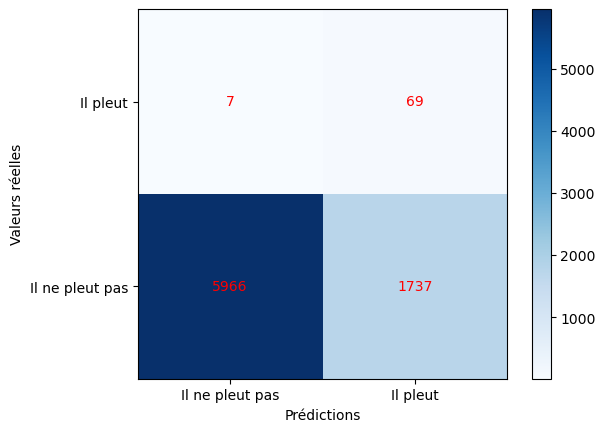

In [259]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# supposons que y_true sont les vraies valeurs et y_pred sont les prédictions du modèle
#cm = confusion_matrix(p, y_pred)
cm = confusion_matrix(Y_test, y_pred)
# extraire les valeurs de la matrice de confusion
tn, fp, fn, tp = cm.ravel()

# afficher la matrice de confusion
print(cm)

# créer un tableau pour l'affichage
conf_matrix = np.array([[fn,tp], [tn,fp]])

# créer le graphique
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix, cmap='Blues')

# ajouter les annotations
for i in range(2):
    for j in range(2):
        text = ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='r')

# ajouter les étiquettes
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Il ne pleut pas', 'Il pleut'])
ax.set_yticklabels(['Il pleut', 'Il ne pleut pas'])
ax.set_xlabel('Prédictions')
ax.set_ylabel('Valeurs réelles')

# ajouter une barre de couleur
plt.colorbar(im)

# afficher le graphique
plt.show()


In [260]:
df_ytest = pd.DataFrame(Y_test, columns=['pluie'])
df_ypred = pd.DataFrame(y_pred, columns=['pluie'])
df_ytest.value_counts()

pluie
0.0      7703
1.0        76
dtype: int64

In [261]:
df_ytest

,pluie
2023-02-23 12:58:00,0.0
2023-02-23 12:59:00,0.0
2023-02-23 13:00:00,0.0
2023-02-23 13:01:00,0.0
2023-02-23 13:02:00,0.0
...,...
2023-02-28 23:55:00,0.0
2023-02-28 23:56:00,0.0
2023-02-28 23:57:00,0.0
2023-02-28 23:58:00,0.0


In [262]:
df_ypred

,pluie
0,1
1,1
2,1
3,1
4,1
...,...
7774,0
7775,0
7776,0
7777,0


In [263]:
import pandas as pd

# créer un DataFrame à partir de Y_test avec les dates comme index
df = pd.DataFrame(Y_test, index=Y_test.index)

# ajouter une colonne pour les valeurs prédites y_pred
df['y_pred'] = y_pred

# afficher le résultat
print(df)

                     pluie  y_pred
2023-02-23 12:58:00    0.0       1
2023-02-23 12:59:00    0.0       1
2023-02-23 13:00:00    0.0       1
2023-02-23 13:01:00    0.0       1
2023-02-23 13:02:00    0.0       1
...                    ...     ...
2023-02-28 23:55:00    0.0       0
2023-02-28 23:56:00    0.0       0
2023-02-28 23:57:00    0.0       0
2023-02-28 23:58:00    0.0       0
2023-02-28 23:59:00    0.0       0

[7779 rows x 2 columns]


Erreurs grave = 1

In [264]:
rain_pred = df.loc[(df['pluie'] == 1) & (df['y_pred'] == 0)] #erreur grave model.fit(X_train, y_resampled, epochs=100, batch_size=50)

# afficher le résultat
print(rain_pred)

                     pluie  y_pred
2023-02-24 09:42:00    1.0       0
2023-02-24 09:48:00    1.0       0
2023-02-24 09:50:00    1.0       0
2023-02-24 09:53:00    1.0       0
2023-02-24 10:08:00    1.0       0
2023-02-24 10:15:00    1.0       0
2023-02-24 10:17:00    1.0       0


il a réussi à prédire qu'il pleut 75 / 76 fois

In [265]:
rain_pred = df.loc[(df['pluie'] == 1) & (df['y_pred'] == 1)] #il a réussi à prédire qu'il pleut 75 / 76 fois
print(rain_pred)

                     pluie  y_pred
2023-02-24 09:43:00    1.0       1
2023-02-24 09:44:00    1.0       1
2023-02-24 09:45:00    1.0       1
2023-02-24 09:46:00    1.0       1
2023-02-24 09:47:00    1.0       1
...                    ...     ...
2023-02-28 13:24:00    1.0       1
2023-02-28 13:25:00    1.0       1
2023-02-28 13:26:00    1.0       1
2023-02-28 13:27:00    1.0       1
2023-02-28 13:28:00    1.0       1

[69 rows x 2 columns]


Il a réussi à prédire qu'il pleut pas 5304 / 7703 

In [266]:
rain_pred = df.loc[(df['pluie'] == 0) & (df['y_pred'] == 0)]
print(rain_pred)

                     pluie  y_pred
2023-02-23 15:37:00    0.0       0
2023-02-23 15:39:00    0.0       0
2023-02-23 15:43:00    0.0       0
2023-02-23 15:51:00    0.0       0
2023-02-23 15:53:00    0.0       0
...                    ...     ...
2023-02-28 23:55:00    0.0       0
2023-02-28 23:56:00    0.0       0
2023-02-28 23:57:00    0.0       0
2023-02-28 23:58:00    0.0       0
2023-02-28 23:59:00    0.0       0

[5966 rows x 2 columns]


# Les fausses alertes : à minimiser si on avait plus de temps

In [267]:
rain_pred = df.loc[(df['pluie'] == 0) & (df['y_pred'] == 1)]
print(rain_pred)

                     pluie  y_pred
2023-02-23 12:58:00    0.0       1
2023-02-23 12:59:00    0.0       1
2023-02-23 13:00:00    0.0       1
2023-02-23 13:01:00    0.0       1
2023-02-23 13:02:00    0.0       1
...                    ...     ...
2023-02-28 15:20:00    0.0       1
2023-02-28 15:22:00    0.0       1
2023-02-28 15:23:00    0.0       1
2023-02-28 15:24:00    0.0       1
2023-02-28 23:54:00    0.0       1

[1737 rows x 2 columns]


#  Résultats de l’analyse et discussion (les limites que vous avez rencontrées/ comment vous les avez


 D'abord nous avons eu des classes déséquillibré(non pluie> pluie) donc notre résultat la classe dominante fausse les résultat de la prédiction, Donc nous avons réequillibré les classes avec le sous-echantillonage (qui a des avantages et des inconvéniants par Il peut améliorer les performances de classification en éliminant le biais causé par les données déséquilibrées. En effet, cela permet au modèle de mieux généraliser et d'éviter de sur-apprendre les exemples majoritaires. comme il  peut entraîner une perte d'informations importantes sur les exemples majoritaires supprimés, ce qui peut réduire les performances du modèle sur des données de test.<br>
 <br>
Ensuite, malgré les des bonnes pratiques pour gérer les problèmes de déséquilibre de classe (sous-échantillonnage) et pour normaliser les données avant de les passer à un modèle LSTM. De plus, elle utilise la validation croisée pour évaluer les performances du modèle sur plusieurs ensembles de données d'entraînement et de validation différents, ce qui permet de mieux généraliser les résultats mais les résultats était aussi biaisé: Accuracy on test set: 96.71%, 
Mean validation accuracy:  0.9393238306045533 .<br>
Nous avons opté pour une autre méthode qui est la grid Search a donné des résultats faibles( nous n'avons pas bien compris la cause ) par contre nous avons une hypothèse : Les hyperparamètres testés ne conviennent pas pour la tâche et les données spécifiques.<br>

<br>
puis, nous avons calculé la performance d'un modèle de classification binaire sur un ensemble de test en utilisant les mesures de précision, de sensibilité et de spécificité. là nous avons commencé à avoir des résultats logiques et discutable.<br>
Avec la matrice de confusion nous avons pu déstinguer les vrais positives et négatives , les faux postives et négatives ce qui a donné une image plus claire sur la précision de notre model. <br> 
Nous avons essayé de tester les hyperparametre à la main  malheuresement et afficher à chaque fois la matrice de confusion. il y'avait pas un résultat bon. et nous avons remarqué que le learning rate le meilleur est 0.01 et les autres  n'améliore pas le score accurancy dans notre cas.<br>
puis fianalement 

